In [1]:
#Bisecting K-means alg

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Text(0.5, 1.0, 'Customer Data')

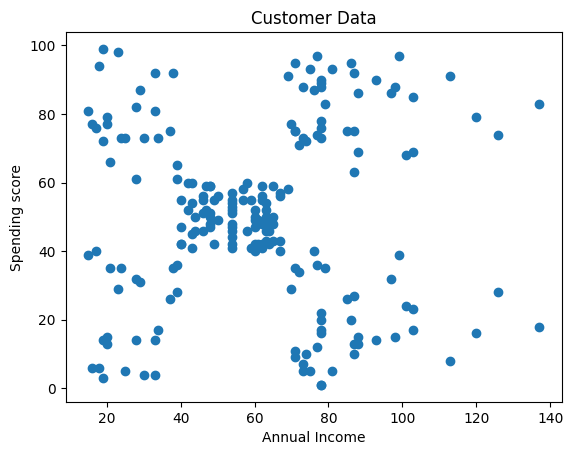

In [5]:
plt.scatter(dataset['Annual Income (k$)'],dataset["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending score")

plt.title("Customer Data")



In [6]:
# Feature selection by using iloc method...
x=dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

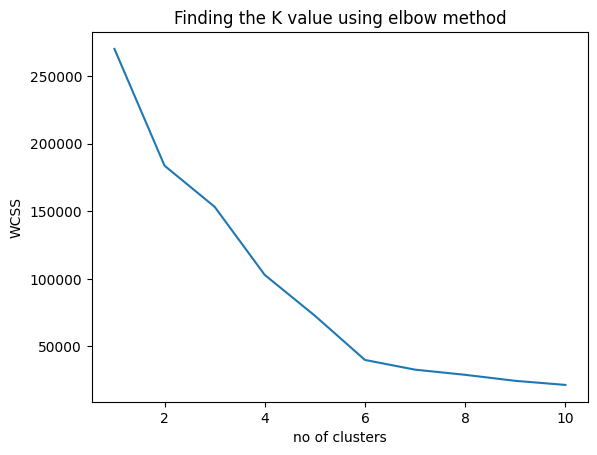

In [7]:
# selecting the no of clusters(k value) using Elbow method 
# inercia for finding sum of squares within the clusters...
from sklearn.cluster import BisectingKMeans
individual_clustering_score=[]
for i in range(1,11):
    BKmeans=BisectingKMeans(n_clusters=i,init='k-means++',random_state=42)  
    BKmeans.fit(x)
    individual_clustering_score.append(BKmeans.inertia_)
plt.plot(range(1,11),individual_clustering_score)
plt.title("Finding the K value using elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()
    
    
    


In [8]:
individual_clustering_score

[269981.28,
 183653.32894736843,
 153253.1465034965,
 102879.359143673,
 72745.71598127982,
 40021.315553076536,
 32838.725309986294,
 29028.215710645476,
 24580.030409356725,
 21554.536469962783]

In [9]:
#to list the centroids
centroids=BKmeans.cluster_centers_
centroids

array([[ 23.77777778,  81.77777778],
       [ 40.45454545,  62.45454545],
       [ 79.67857143,  16.53571429],
       [ 48.2       ,  48.65714286],
       [ 62.65789474,  49.        ],
       [ 27.1       ,  33.        ],
       [ 24.58333333,   9.58333333],
       [ 78.03571429,  81.89285714],
       [108.18181818,  82.72727273],
       [111.        ,  22.77777778]])

In [10]:
# creating model for each found clusters(3)..and making the predictions to find the each datapoints belongs to which clusters)
from sklearn.cluster import BisectingKMeans
BKmeans=BisectingKMeans(n_clusters=5, init='k-means++', random_state=42,bisecting_strategy="biggest_inertia")
y_kmeans=BKmeans.fit(x)
y_kmeans=BKmeans.predict(x)
y_kmeans

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [11]:
#finding the silhouette score of input and model predicted output

from sklearn.metrics import silhouette_score
silhouette_score(x,y_kmeans)

np.float64(0.4131334673066062)

In [12]:
#creating a tble for the existing dataset and appending a column with that
supervised=pd.DataFrame(dataset)
supervised["Cluster_Group"]=y_kmeans
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,4
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


In [13]:
# Saving the datatable as csv
supervised.to_csv('cluster.csv',index=False)

In [14]:
supervised.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_Group'],
      dtype='object')

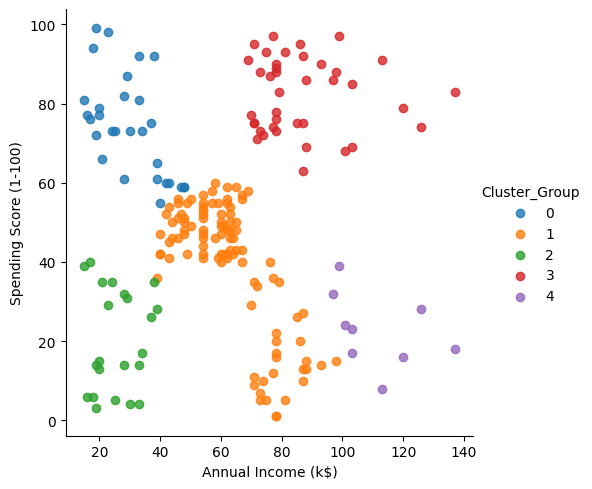

In [15]:
facts=sns.lmplot(supervised, x=supervised.columns[3],y=supervised.columns[4],hue='Cluster_Group',fit_reg=False,legend=True,
    legend_out=None,)